In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np

In [2]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))


Num GPUs Available:  1


In [3]:
(train_images, _), (test_images, _) = tf.keras.datasets.cifar10.load_data()


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [4]:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [5]:
def rgb_to_gray(images):
    return tf.image.rgb_to_grayscale(images)

In [6]:
def create_colorization_model():
    model = models.Sequential()

    model.add(layers.Conv2D(64, (5, 5), strides=(1, 1), padding='same', dilation_rate=2, input_shape=(32, 32, 1)))
    model.add(layers.ReLU())
    model.add(layers.Conv2D(64, (5, 5), strides=(1, 1), padding='same', dilation_rate=2))
    model.add(layers.ReLU())
    model.add(layers.Conv2D(128, (5, 5), strides=(1, 1), padding='same', dilation_rate=2))
    model.add(layers.ReLU())
    model.add(layers.Conv2D(3, (5, 5), strides=(1, 1), padding='same', dilation_rate=2))
    model.add(layers.Activation('sigmoid'))

    return model

In [7]:
model = create_colorization_model()
model.compile(optimizer='adam', loss='mse')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
def train_model(model, train_images, epochs=10, batch_size=64):
    train_gray = rgb_to_gray(train_images)

    model.fit(train_gray, train_images, epochs=epochs, batch_size=batch_size)

train_model(model, train_images)

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 35s 35ms/step - loss: 0.0143
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 34s 34ms/step - loss: 0.0062
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 42s 35ms/step - loss: 0.0060
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 28s 36ms/step - loss: 0.0057
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 40s 35ms/step - loss: 0.0056
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 28s 35ms/step - loss: 0.0055
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 27s 35ms/step - loss: 0.0055
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 28s 36ms/step - loss: 0.0053
Epoch 9/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 28s 36ms/step - loss: 0.0054
Epoch 10/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 28s 35ms/step - loss: 0.0053


In [23]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

def colorize_and_visualize_image(model, gray_image):

    gray_image_tensor = np.expand_dims(gray_image, axis=-1)
    gray_image_tensor = np.expand_dims(gray_image_tensor, axis=0)
    gray_image_tensor = gray_image_tensor.astype(np.float32) / 255.0

    colorized_image_tensor = model.predict(gray_image_tensor)

    colorized_image = colorized_image_tensor.squeeze()
    colorized_image = np.clip(colorized_image, 0, 1)

In [24]:
def exaggregate_color(images, saturation_factor=1.5, value_factor=1.5):
    images = (images + 1) / 2.0

    images_hsv = tf.image.rgb_to_hsv(images)

    images_hsv = tf.stack([
        images_hsv[..., 0],
        tf.clip_by_value(images_hsv[..., 1] * saturation_factor, 0, 1),
        tf.clip_by_value(images_hsv[..., 2] * value_factor, 0, 1)
    ], axis=-1)

    color_rgb = tf.image.hsv_to_rgb(images_hsv)

    color_rgb = color_rgb * 2.0 - 1.0

    return color_rgb

In [25]:
import os

current_directory = os.getcwd()

print("Current working directory:", current_directory)

Current working directory: /content


In [32]:
from google.colab import files

uploaded = files.upload()

for filename in uploaded.keys():
    print("Uploaded file:", filename)

Saving s.jpg to s (1).jpg
Uploaded file: s (1).jpg


In [34]:
from PIL import Image

img = Image.open('s.jpg')
gray_img = img.convert("L")

In [35]:
import tensorflow as tf

def transform(image):
    image = tf.image.convert_image_dtype(image, tf.float32)


    return image



In [36]:
import tensorflow as tf


img_tensor = transform(gray_img)

img_tensor = tf.expand_dims(img_tensor, axis=0)

colorized_tensor = model(img_tensor)



In [37]:
import tensorflow as tf
import numpy as np
from PIL import Image

colorized_tensor = tf.squeeze(colorized_tensor, axis=0)
colorized_tensor = tf.clip_by_value(colorized_tensor, 0.0, 1.0)

colorized_array = colorized_tensor.numpy()

colorized_img = Image.fromarray((colorized_array * 255).astype(np.uint8))

colorized_img.save("_colorized2.jpg")


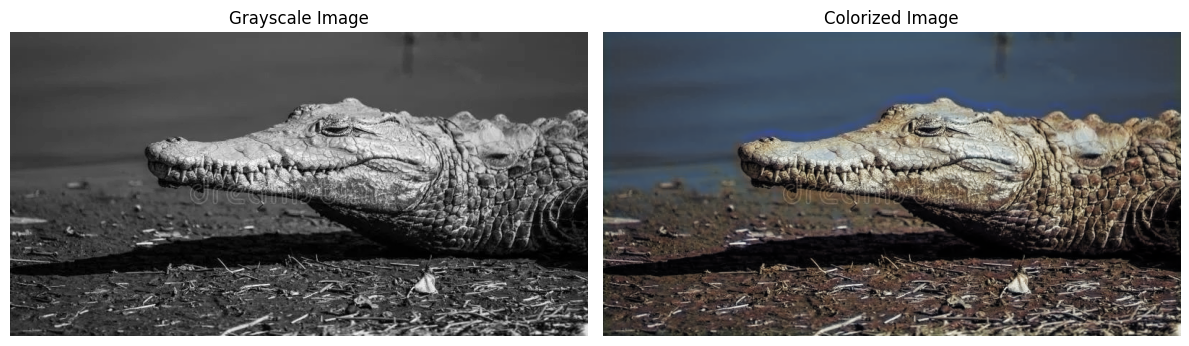

In [39]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))


ax[0].imshow(gray_img, cmap='gray')
ax[0].set_title("Grayscale Image")
ax[0].axis('off')

ax[1].imshow(colorized_img)
ax[1].set_title("Colorized Image")
ax[1].axis('off')
plt.tight_layout()
plt.show()